<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo 5.5. Sistema de inventarios

La demanda de un cierto producto sigue la siguiente distribucion de probabilidad empirica:

In [23]:
import pandas as pd

# Lista completa de cantidades y probabilidades en orden vertical
cantidades = [
    35, 36, 37, 38, 39, 40, 41, 42, 43,
    44, 45, 46, 47, 48, 49, 50, 51, 52,
    53, 54, 55, 56, 57, 58, 59, 60
]

probabilidades = [
    0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028,
    0.029, 0.035, 0.045, 0.060, 0.065, 0.070, 0.080, 0.075, 0.070,
    0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005
]

# Crear DataFrame vertical
df_vertical = pd.DataFrame({
    "Cantidad": cantidades,
    "Probabilidad": probabilidades
})

# Mostrar tabla
df_vertical



,Cantidad,Probabilidad
0,35,0.010
1,36,0.015
2,37,0.020
3,38,0.020
4,39,0.022
5,40,0.023
6,41,0.025
7,42,0.027
8,43,0.028
9,44,0.029


El tiempo de entrega esta distribuido de acuerdo a la siguiente función de probabilidad

In [24]:
# Crear tabla
df = pd.DataFrame({
    'Meses': [1, 2, 3],
    'Probabilidad': [0.30, 0.40, 0.30]
})

# Mostrar tabla
df


,Meses,Probabilidad
0,1,0.3
1,2,0.4
2,3,0.3


Los factores estacionales para cada uno de los meses del año son como se muestra a continuación:

In [25]:
# Datos reestructurados en una sola columna
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
factores = [1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40]

# Crear DataFrame
df_factores = pd.DataFrame({
    "Mes": meses,
    "Factor estacional": factores
})

# Mostrar tabla
df_factores


,Mes,Factor estacional
0,1,1.2
1,2,1.0
2,3,0.9
3,4,0.8
4,5,0.8
5,6,0.7
6,7,0.8
7,8,0.9
8,9,1.0
9,10,1.2


La informacion con respecto a los costos relevantes es la siguiente:

Costo de ordenar $ = \$ 100/orden$

Costo de inventario $ = \$20/ unidad/ año$

Costo faltante $ = \$50/unidad$

Si el inventario inicial se asume en $150 \text{ unidades}$, ¿determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?

Los sistemas de inventarios a menudo contiene varios componentes estocasticos que interactuan entre sí. Cuando estos componentes son importantes, su conjsideración en el modelo de inventarios determinísticos asume demanda conocida y constante; un tiempo de producción o de entrega conocido y fijo; una razón de producción infinita; no se permite faltante; y los costos de llevar inventario y de ordenar son parámetros que tienen un comportamiento lineal. Cuando la demanda es aleatoria, el modelo de inventario es un poco más sofisticado. Los sistemas de inventario, sin embargo, contienen más componentes estocásticos. Además de las variaciones en la demanda aleatoria, ésta puede tener un comportamiento estacional. El tiempo de entrega entre colocar y recibir una orden puede ser estocástico. Se puede satisfacer con inventarios de períodos actuales, la demanda insatisfecha de períodos previos. Los costos de ordenar, llevar inventario y de faltante pueden ser difíciles de estimar. Estos parámetros pueden también ser no-lineales. Si muchas de estas complicaciones son importantes al sistema de inventarios que se está analizando, el desarrollo de un modelo matemático que represente a este sistema podría resultar significativamente complejo. Sin embargo, un modelo de simulación, procesado con la ayuda de la computadora, podría ser más fácil, más confiable y más efectivo.

El sistema de inventarios que se analiza es lote constante y tiempo entre pedidos variables. Las variables de decisión para este modelo son la cantidad a ordenar q y el nivel de reorden R, las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo de faltante). Por consiguiente, para evaluar el funcionamiento del sistema de acuerdo a los valores de las variables de decisión utilizadas, costos totales anuales son acumulados. Cada vez que una orden es colocada, el costo de ordenar anual es incrementado en $100. El nivel de inventario promedio mensual es utilizado para evaluar el costo de llevar inventario*. Al final de cada mes se determina el número de unidades faltantes y el costo que esto representa. La suma de los costos anteriores, proporciona el costo total anual.

Para entender el proceso de simulación de este sistema de inventario, una simulación manual de un año de operación es presentada en la tabla 5.7, y en la figura 5.2. Los valores de las variables de decisión utilizados en esta simulación son: $q = 200$ y $R = 100$. También, para esta simulación se utilizó el método de la transformada inversa para simular las demandas (ver tabla 5.9) y los tiempos de entrega (ver tabla 5.10). El inventario inicial es de 150 unidades. La demanda simulada para el primer mes (considerando el factor de ajuste) fue de 64, lo cual reducirá el inventario al final del mes a 86. El inventario promedio del primer mes es por consiguiente $(150 + 86)/2 = 118$. Al final del primer mes, el nivel de existencias es menor que el nivel de reorden, por lo cual la primera orden es colocada. De acuerdo a la tabla 5.11, el tiempo de entrega de esta primera orden es de 1 mes. Por consiguiente, al principio del tercer mes 200 unidades se agregarán al nivel de existencias. Al final del sexto mes, una segunda orden es colocada, la cual de acuerdo a la tabla 5.11, se entregará a principios del décimo mes. Este tiempo de entrega de tres meses, origina en el noveno mes un faltante de 29 unidades. Consecuentemente, de las 200 unidades que llegarán al principio del décimo mes, 29 serán usadas para satisfacer la demanda que quedó insatisfecha en el período anterior. Finalmente, la tabla 5.8 muestra el costo total del sistema de inventario para un año de operación.

Si se simulan varios años más (30 por ejemplo), se podría obtener el costo total promedio anual asociado a los valores mencionados de decisión $(q = 200, R = 100)$. Sin embargo, lo importante es aplicar una metodología que progresivamente vaya mejorando los valores de las variables de decisión hasta determinar sus valores óptimos. Para este propósito, el algoritmo de Hooke y Jeeves* será aplicado. De acuerdo a este algoritmo, primero hay que seleccionar valores iniciales apropiados de las variables de decisión. Después, hay que obtener el costo total relacionado a estos valores. En seguida, se usa esta información para mejorar los valores de las variables de decisión. Esta iteración será repetida hasta que los valores óptimos de las variables de decisión hayan sido encontrados. La tabla 5.12 muestra todas las iteraciones que resultan de aplicar este algoritmo. En esta tabla se puede observar que los valores óptimos de las variables de decisión son: $q = 173$ y $R = 163$, lo cual produce un costo total promedio anual de $\$3,245$.






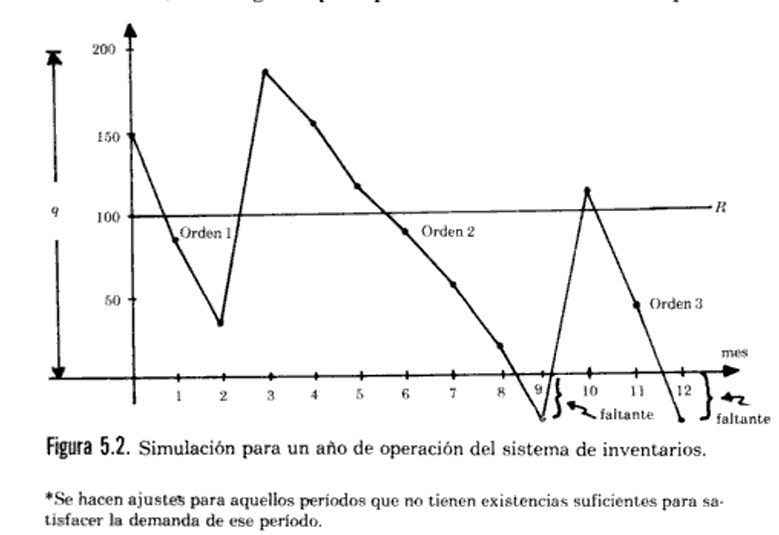

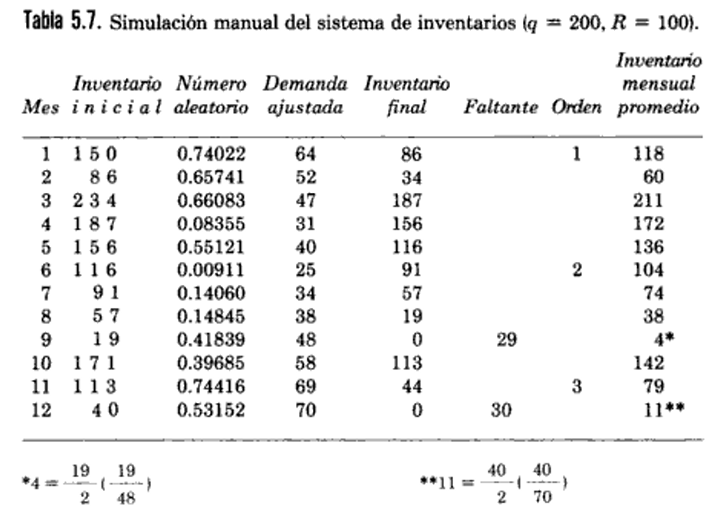

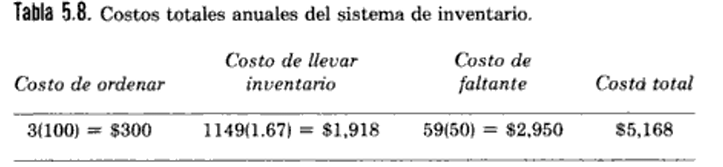

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Definición de costos asociados al sistema de inventario
costo_orden = 100          # Costo fijo por realizar una orden
costo_mant = 20            # Costo unitario de mantener inventario
costo_faltante = 50        # Costo unitario por faltante de demanda

In [28]:
# Distribución base de demanda (no utilizada directamente) y factores de ajuste estacional por mes
valores_demanda = [50, 60, 70, 80, 90]
ajustes_estacionales = [1.0 + 0.1 * i for i in range(12)]  # Factores crecientes de estacionalidad por mes

In [29]:
# Parámetros de control del sistema de inventario
nivel_reorden = 100    # Punto de reorden (nivel de inventario a partir del cual se genera una orden)
tam_pedido = 200       # Tamaño fijo del lote a ordenar
stock_inicial = 150    # Nivel inicial de inventario disponible al inicio del primer mes

In [30]:
# Conjunto de valores pseudoaleatorios predefinidos que simulan incertidumbre en la demanda mensual
valores_aleatorios = [
    0.74022, 0.65741, 0.66083, 0.08355, 0.55121, 0.00911,
    0.14060, 0.14845, 0.41839, 0.39685, 0.74416, 0.53152
]

In [31]:
# Función que transforma un número aleatorio en una demanda ajustada según el mes correspondiente
def obtener_demanda(rnd, idx_mes):
    base = np.interp(rnd, [0, 1], [50, 90])          # Interpolación lineal para demanda base
    return round(base * ajustes_estacionales[idx_mes])  # Aplicación del factor estacional correspondiente

In [32]:
# Inicialización de listas para registrar información mensual
meses_anio = list(range(1, 13))          # Lista de los 12 meses del año
stock_inicio = []                        # Inventario al inicio de cada mes
stock_fin = []                           # Inventario al final de cada mes
pedidos = []                             # Cantidad ordenada en cada mes (0 o tam_pedido)
consumo = []                             # Demanda ajustada de cada mes


In [33]:
# Inicialización del nivel actual de inventario
nivel_actual = stock_inicial

In [34]:
# Simulación del comportamiento del inventario durante 12 periodos (meses)
for i in range(12):
    stock_inicio.append(nivel_actual)                       # Registro del inventario inicial del mes
    demanda_mes = obtener_demanda(valores_aleatorios[i], i)  # Cálculo de la demanda ajustada del mes
    consumo.append(demanda_mes)                             # Registro de la demanda observada

    # Cálculo del inventario restante tras satisfacer la demanda (o lo que se pueda)
    restante = max(0, nivel_actual - demanda_mes)
    stock_fin.append(restante)

    # Evaluación de la necesidad de ordenar: si el inventario cae por debajo del nivel de reorden
    if restante <= nivel_reorden:
        pedido_realizado = tam_pedido
        restante += tam_pedido    # Se repone el inventario con una orden fija
    else:
        pedido_realizado = 0      # No se realiza pedido si el inventario es suficiente

    pedidos.append(pedido_realizado)       # Registro de la orden (si aplica)
    nivel_actual = restante                # Actualización del inventario para el siguiente mes

In [35]:
# Creación de un DataFrame con los resultados mensuales simulados
resumen_inventario = pd.DataFrame({
    'Mes': meses_anio,
    'Stock Inicial': stock_inicio,
    'Demanda Estimada': consumo,
    'Stock Final': stock_fin,
    'Pedido': pedidos
})

In [36]:
# Visualización del resumen generado (opcional si se ejecuta en entorno interactivo como Jupyter)
resumen_inventario

,Mes,Stock Inicial,Demanda Estimada,Stock Final,Pedido
0,1,150,80,70,200
1,2,270,84,186,0
2,3,186,92,94,200
3,4,294,69,225,0
4,5,225,101,124,0
5,6,124,76,48,200
6,7,248,89,159,0
7,8,159,95,64,200
8,9,264,120,144,0
9,10,144,125,19,200


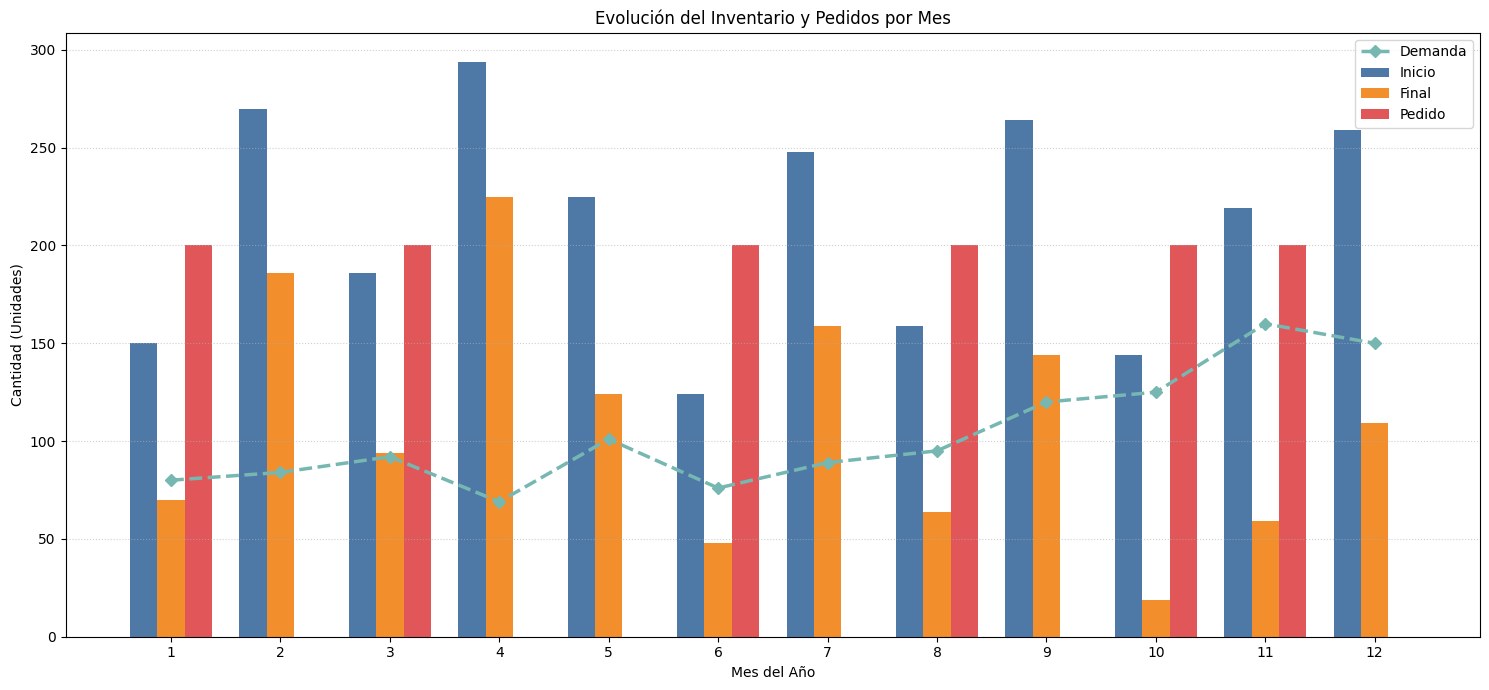

In [37]:
# Personalización del gráfico de barras para visualizar inventario, pedidos y demanda estimada
plt.figure(figsize=(15, 7))  # Definición del tamaño de la figura

ancho_barras = 0.25
eje_x = np.arange(len(resumen_inventario))  # Posiciones de los meses en el eje X

# Generación de tres barras por cada mes: inventario inicial, final y pedidos
plt.bar(eje_x - ancho_barras, resumen_inventario['Stock Inicial'], width=ancho_barras,
        label='Inicio', color='#4E79A7')
plt.bar(eje_x, resumen_inventario['Stock Final'], width=ancho_barras,
        label='Final', color='#F28E2B')
plt.bar(eje_x + ancho_barras, resumen_inventario['Pedido'], width=ancho_barras,
        label='Pedido', color='#E15759')

# Agregado de línea de demanda estimada sobre las barras
plt.plot(eje_x, resumen_inventario['Demanda Estimada'], label='Demanda',
         color='#76B7B2', linestyle='--', linewidth=2.5, marker='D')

# Configuración estética de la gráfica
plt.title('Evolución del Inventario y Pedidos por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Cantidad (Unidades)')
plt.xticks(eje_x, resumen_inventario['Mes'])
plt.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Metodo de inversa para simulasion de la demanda

In [38]:
# Definición de función que aplica el método de la inversa para asignar demanda discreta
def calcular_demanda(prob):
    escalas = [
        (0.00, 0.01, 35), (0.01, 0.025, 36), (0.025, 0.045, 37), (0.045, 0.065, 38),
        (0.065, 0.087, 39), (0.087, 0.11, 40), (0.11, 0.135, 41), (0.135, 0.162, 42),
        (0.162, 0.19, 43), (0.19, 0.219, 44), (0.219, 0.254, 45), (0.254, 0.299, 46),
        (0.299, 0.359, 47), (0.359, 0.424, 48), (0.424, 0.494, 49), (0.494, 0.574, 50),
        (0.574, 0.649, 51), (0.649, 0.719, 52), (0.719, 0.784, 53), (0.784, 0.844, 54),
        (0.844, 0.894, 55), (0.894, 0.934, 56), (0.934, 0.964, 57), (0.964, 0.980, 58),
        (0.980, 0.995, 59), (0.995, 1.00, 60)
    ]
    for inferior, superior, valor in escalas:
        if inferior <= prob < superior:
            return valor


In [39]:
# Generación de muestras aleatorias y cálculo de demanda simulada mediante la función anterior
aleatorios = [random.random() for _ in range(1000)]
demandas = [calcular_demanda(u) for u in aleatorios]

# Cálculo de la media de las demandas simuladas
media_total = np.mean(demandas)
print(f'Media estimada de la demanda: {media_total:.2f}')


Media estimada de la demanda: 48.66


Grafica de convergenci de la media acumulativa

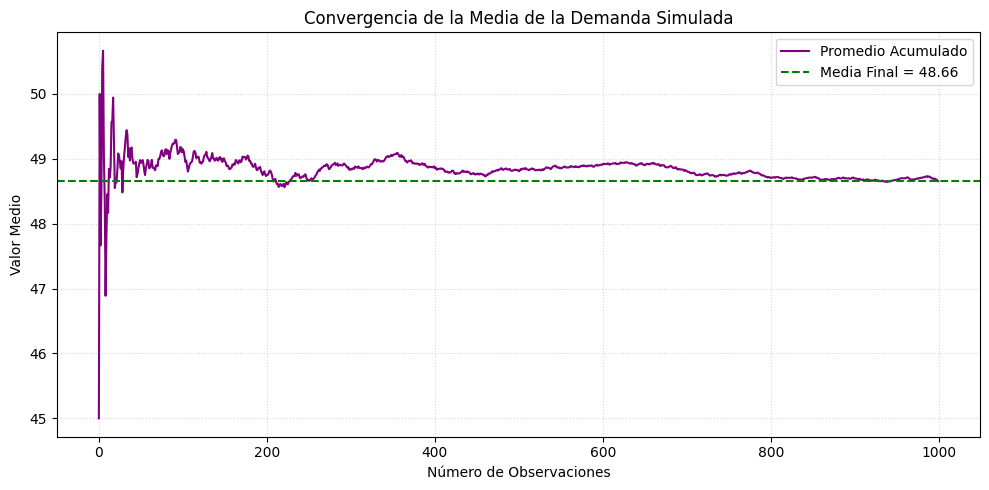

In [40]:
# Cálculo del promedio acumulado a lo largo de las iteraciones (para visualizar convergencia)
prom_acumulado = np.cumsum(demandas) / (np.arange(1, len(demandas) + 1))

# Representación gráfica del comportamiento de la media acumulativa
plt.figure(figsize=(10, 5))
plt.plot(prom_acumulado, label='Promedio Acumulado', color='purple')
plt.axhline(y=media_total, color='green', linestyle='--',
            label=f'Media Final = {media_total:.2f}')
plt.xlabel('Número de Observaciones')
plt.ylabel('Valor Medio')
plt.title('Convergencia de la Media de la Demanda Simulada')
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Simulacion para encontrar la politica de inventario optima

In [41]:
# Definición de parámetros económicos unitarios
c_orden = 100     # Costo por orden colocada
c_mant = 20       # Costo por unidad mantenida
c_falt = 50       # Costo por unidad faltante

# Distribución de probabilidades y valores asociados a la demanda
p_dem = np.array([0.01, 0.015, 0.02, 0.02, 0.022, 0.023, 0.025, 0.027,
                  0.028, 0.029, 0.035, 0.045, 0.065, 0.07, 0.075, 0.08])
v_dem = [35 + i for i in range(16)]  # Valores discretos de demanda

# Normalización de la distribución de demanda
p_dem /= p_dem.sum()

# Distribución de probabilidades de tiempo de entrega (en meses)
p_ent = [0.3, 0.4, 0.3]
v_ent = [1, 2, 3]

# Factores estacionales por mes
est_mensual = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]


Busqueda de $q$ y $R$

In [42]:
# Inicialización de variables para registrar la mejor combinación (mínimo costo)
mejor_coste = float('inf')
opt_q = None
opt_R = None

# Evaluación de combinaciones de políticas de inventario: (q, R)
for cantidad in range(100, 301, 50):  # Tamaño de lote (q)
    for nivel in range(50, 201, 50):  # Punto de reorden (R)
        stock = 150
        costo_ord, costo_inv, costo_falt = 0, 0, 0

        # Simulación mensual por un año
        for mes in range(12):
            est = est_mensual[mes]
            dem = np.random.choice(v_dem, p=p_dem) * est  # Demanda estacional simulada

            if stock < dem:
                falt = dem - stock
                costo_falt += falt * c_falt
                sobrante = 0
            else:
                sobrante = stock - dem

            if sobrante <= nivel:
                entrega = np.random.choice(v_ent, p=p_ent)  # Tiempo de entrega simulado
                stock = sobrante + cantidad
                costo_ord += c_orden
            else:
                stock = sobrante

            costo_inv += sobrante * c_mant  # Acumulación de costos de mantenimiento

        # Cálculo del costo total asociado a la política actual
        total_coste = costo_ord + costo_inv + costo_falt

        # Actualización del mínimo si se encuentra una mejor política
        if total_coste < mejor_coste:
            mejor_coste = total_coste
            opt_q = cantidad
            opt_R = nivel

# Impresión de los resultados óptimos encontrados
print(f'Parámetro óptimo Q: {opt_q}')
print(f'Nivel óptimo R: {opt_R}')
print(f'Costo mínimo encontrado: {mejor_coste:.2f}')


Parámetro óptimo Q: 100
Nivel óptimo R: 50
Costo mínimo encontrado: 16544.00
